In [1]:
import numpy as np
import pandas as pd


In [13]:
data = pd.read_csv("Churn_Modelling.csv")

In [14]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.duplicated().sum()

0

### Imbalanced Problem

In [16]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [17]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [19]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=108)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [22]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()

X_train_scal = scal.fit_transform(X_train)
X_test_scal = scal.fit_transform(X_test)

In [23]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

There will be:

1. input layer
2. hidden layer ==> will put 3 nodes/perceptron in hidden layer
3. output layer

In [44]:
model = Sequential()

## input layer
model.add(Dense(3, activation='sigmoid',input_dim=11))
## output layer
model.add(Dense(1,activation='sigmoid'))

/Users/saee2510/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
## model compilation
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [47]:
hist = model.fit(X_train_scal,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - loss: 0.6130
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.5207
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.4849
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.4602
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.4480
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.4398
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 0.4307
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.4334
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.4306
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.4147


In [48]:
hist.history

{'loss': [0.5834174752235413,
  0.5056858062744141,
  0.4737549424171448,
  0.4586632251739502,
  0.4495532214641571,
  0.4431000351905823,
  0.4381421208381653,
  0.4342474341392517,
  0.4311024248600006,
  0.42853260040283203]}

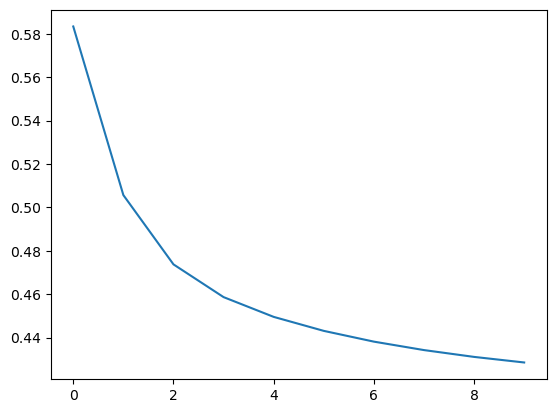

In [49]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.show()

Here we have all Weights and Biases of our model

Lets check all Weights and Biases of model now

In [50]:
# weights and biases for layer 0
model.layers[0].get_weights()

[array([[-3.0094959e-02,  4.5251176e-01,  1.9864909e-01],
        [-2.2059245e+00, -1.1353363e-01, -1.0396208e+00],
        [ 7.0084162e-02, -3.3200356e-01,  7.3734820e-02],
        [-4.4948909e-02, -6.2125498e-01, -6.9494003e-01],
        [ 1.2065706e-01,  7.3968291e-01,  3.8267370e-02],
        [ 8.4862057e-03,  3.1671470e-01,  1.0718979e-01],
        [ 4.1037470e-01,  2.5336310e-01,  1.0014629e+00],
        [-4.2493038e-02,  1.8555984e-01, -4.0404388e-04],
        [-5.7672995e-01, -6.9462973e-01, -5.6290591e-01],
        [ 1.5806377e-01,  8.1248648e-02, -1.4040017e-01],
        [ 3.8210851e-01,  7.0122951e-01,  6.9517130e-01]], dtype=float32),
 array([ 0.34796786, -0.14727068,  0.34514773], dtype=float32)]

In [51]:
# weights and biases for layer 1
model.layers[1].get_weights()

[array([[-1.3429672 ],
        [-0.07988061],
        [-1.0455992 ]], dtype=float32),
 array([-0.2135922], dtype=float32)]

In [52]:
## predictions
model.predict(X_test_scal)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step


array([[0.18439953],
       [0.10361356],
       [0.12329881],
       ...,
       [0.11472008],
       [0.1113616 ],
       [0.08607695]], dtype=float32)

In [53]:
#output in classes now
y_pred = np.where(model.predict(X_test_scal)>0.5,1,0)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.787

### How to change ANN Architecture for more accuracy improvement
This can be improved by:

- Hidden layer activation fucntion to ReLu
- Increase Epoch to 1000
- Increase number of nodes in Hidden layer say 8 or 10
- Increase number of Hidden Layers ==> can lead to overfitting

In [55]:
model = Sequential()

#input layer
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
#output layer
model.add(Dense(1,activation='sigmoid'))

model.summary()

/Users/saee2510/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
#binary_crossentropy or can say log loss 
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

hist_ = model.fit(X_train_scal, y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.7307 - loss: 0.5743 - val_accuracy: 0.8100 - val_loss: 0.4578
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.7992 - loss: 0.4563 - val_accuracy: 0.8138 - val_loss: 0.4267
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.7962 - loss: 0.4407 - val_accuracy: 0.8194 - val_loss: 0.4181
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.8182 - loss: 0.4133 - val_accuracy: 0.8281 - val_loss: 0.4131
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.8248 - loss: 0.4155 - val_accuracy: 0.8344 - val_loss: 0.4038
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.8349 - loss: 0.4055 - val_accuracy: 0.8394 - val_loss: 0.3984
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.8405 - loss: 0.3919 - val_accuracy: 0.8438 - val_loss: 0.3923
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.8369 - loss: 0

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.8712 - loss: 0.3205 - val_accuracy: 0.8637 - val_loss: 0.3437
Epoch 51/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8765 - loss: 0.3107 - val_accuracy: 0.8612 - val_loss: 0.3423
Epoch 52/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8732 - loss: 0.3142 - val_accuracy: 0.8600 - val_loss: 0.3423
Epoch 53/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8693 - loss: 0.3135 - val_accuracy: 0.8594 - val_loss: 0.3423
Epoch 54/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.8653 - loss: 0.3331 - val_accuracy: 0.8594 - val_loss: 0.3453
Epoch 55/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.8707 - loss: 0.3215 - val_accuracy: 0.8569 - val_loss: 0.3430
Epoch 56/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8731 - loss: 0.3177 - val_accuracy: 0.8575 - val_loss: 0.3431
Epoch 57/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.8675 - loss: 0.3294

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.8729 - loss: 0.3159 - val_accuracy: 0.8581 - val_loss: 0.3446
Epoch 100/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8744 - loss: 0.3086 - val_accuracy: 0.8587 - val_loss: 0.3458


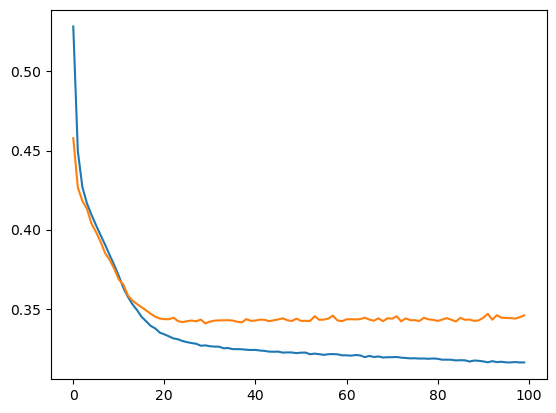

In [58]:
plt.plot(hist_.history['loss'])
plt.plot(hist_.history['val_loss'])
plt.show()